Zadanie 3

In [1]:
import numpy as np
import random
import scipy
import matplotlib.pyplot as plt

In [2]:
def autokowariancja(h, x):
    n = len(x)
    mean_x = np.mean(x)
    return 1/n * np.sum((x[:n-abs(h)] - mean_x) * (x[abs(h):] - mean_x))

In [3]:
def autokorelacja(h, x):
    return autokowariancja(h, x) / autokowariancja(0,x)

In [4]:
def autokowariancja_teo(h, x):
    if h == 0:
        return 4
    else:
        return 0

In [5]:
def autokorelacja_teo(h, x):
    if h == 0:
        return 1
    else:
        return 0

In [46]:
sample = np.random.normal(0, 2, 1000)

In [20]:
hs = np.arange(0, 10, 1)
ns = np.arange(30,2000,10)

In [48]:
autokow, autokor = [], []
autokow_teo, autokor_teo = [], []

In [49]:
for h in hs:
    autokow.append(autokowariancja(h, sample))
    autokor.append(autokorelacja(h, sample))
    autokow_teo.append(autokowariancja_teo(h, sample))
    autokor_teo.append(autokorelacja_teo(h, sample))

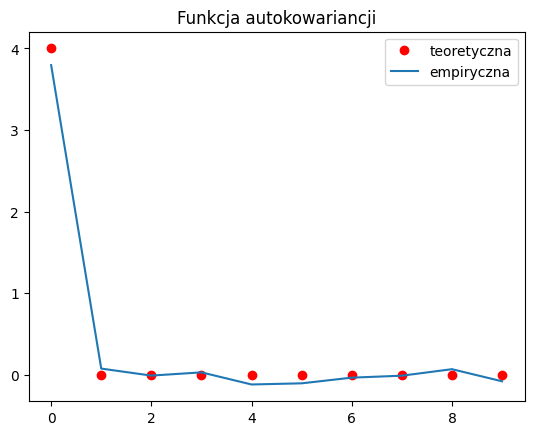

In [50]:
plt.plot(hs, autokow_teo, "ro", label="teoretyczna")
plt.plot(hs, autokow, label="empiryczna")
plt.title("Funkcja autokowariancji")
plt.legend(loc="best")
plt.show()

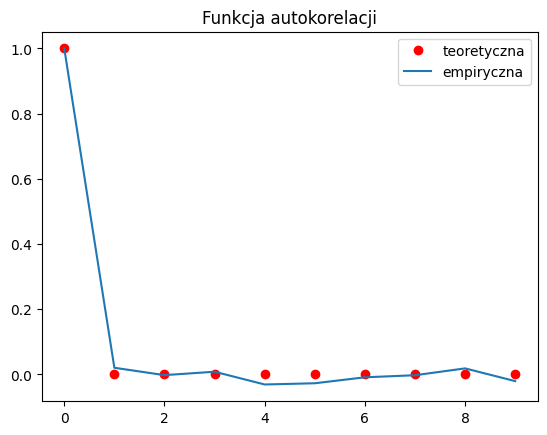

In [51]:
plt.plot(hs, autokor_teo, "ro", label="teoretyczna")
plt.plot(hs, autokor, label="empiryczna")
plt.title("Funkcja autokorelacji")
plt.legend(loc="best")
plt.show()

In [20]:
bledy_autokow, bledy_autokor = [], []
for n in ns:
    autokow, autokor = [], []
    autokow_teo, autokor_teo = [], []
    sample = np.random.normal(0, 2, n)
    bledy_n_autokow = 0
    bledy_n_autokor = 0
    for h in hs:
        teo_autokow = autokowariancja_teo(h, sample)
        teo_autokor = autokorelacja_teo(h, sample)
        emp_autokow = autokowariancja(h, sample)
        emp_autokor = autokorelacja(h, sample)
        autokow.append(emp_autokow)
        autokor.append(emp_autokor)
        autokow_teo.append(teo_autokow)
        autokor_teo.append(teo_autokor)
        bledy_n_autokow += abs(teo_autokow - emp_autokow)
        bledy_n_autokor += abs(teo_autokor - emp_autokor)
    bledy_autokor.append(bledy_n_autokor/10)
    bledy_autokow.append(bledy_n_autokow/10)

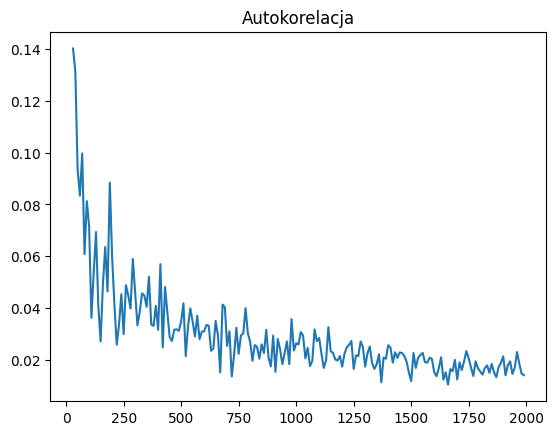

In [23]:
plt.plot(ns, bledy_autokor)
plt.title("Autokorelacja")
plt.show()

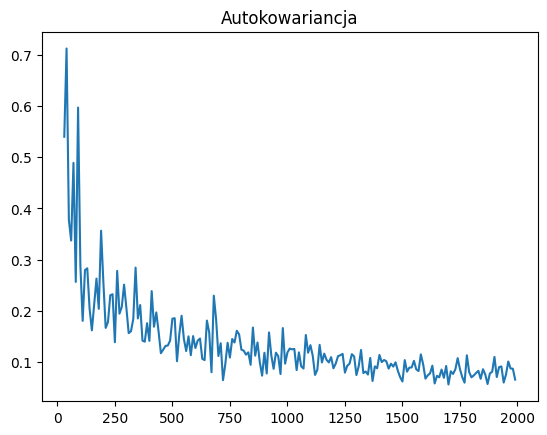

In [24]:
plt.plot(ns,bledy_autokow)
plt.title("Autokowariancja")
plt.show()

Zadanie 4


In [6]:
sigma = 1
theta = 0.5

In [7]:
def ma1_teo_acvf(h, sigma, theta):
    if h == 0:
        return sigma**2 * (1 + theta**2)
    elif h == -1 or h == 1:
        return theta * sigma**2
    else:
        return 0

In [8]:
def ma1_teo_acf(h, theta):
    if h == 0:
        return 1
    elif h == 1 or h == -1:
        return theta / (1 + theta**2)
    else:
        return 0

In [9]:
def ma1_sample(n, sigma, theta):
    z = np.random.normal(0, sigma, n+1)
    x = np.zeros(n)
    for i in range(1,n+1):
        x[i-1] = z[i] + theta * z[i-1]
    return x

In [43]:
x = ma1_sample(1000, sigma, theta)

In [44]:
teo_acf, emp_acf, teo_acvf, emp_acvf = [], [], [], []
for h in hs:
    teo_acf.append(ma1_teo_acf(h, theta))
    emp_acf.append(autokorelacja(h, x))
    teo_acvf.append(ma1_teo_acvf(h, sigma, theta))
    emp_acvf.append(autokowariancja(h, x))

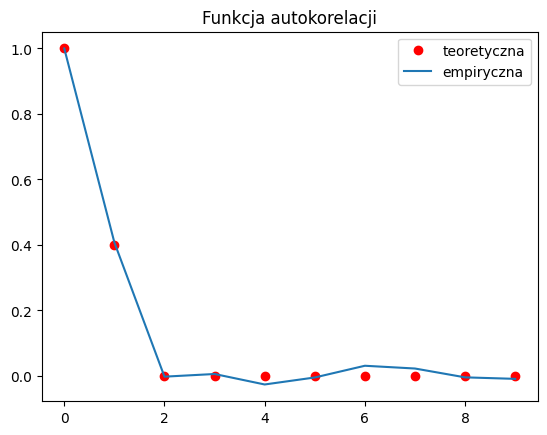

In [45]:
plt.plot(hs, teo_acf, "ro", label="teoretyczna")
plt.plot(hs, emp_acf, label="empiryczna")
plt.legend(loc="best")
plt.title("Funkcja autokorelacji")
plt.show()

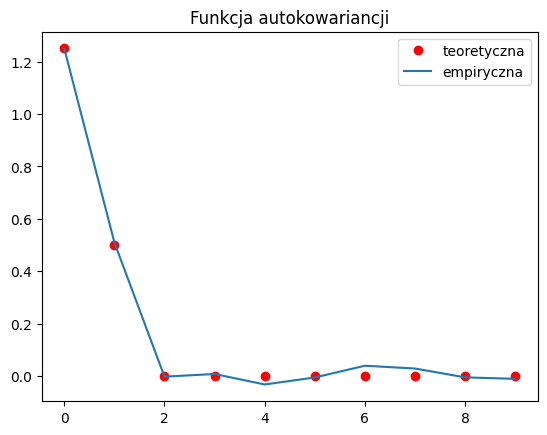

In [46]:
plt.plot(hs, teo_acvf, "ro", label="teoretyczna")
plt.plot(hs, emp_acvf, label="empiryczna")
plt.legend(loc="best")
plt.title("Funkcja autokowariancji")
plt.show()

Zadanie 5

In [136]:
def ma1_w_noise(n, sigma, theta, a, p):
    y = ma1_sample(n, sigma, theta)
    noise = np.random.random(n)
    x = np.where(noise < p/2, y + a, np.where(noise < p, y - a, y))
    return x, y

In [137]:
def ro_star(h, x):
    n = len(x)
    median_x = np.median(x)
    return 1/(n-h) * np.sum(np.sign((x[:n-abs(h)] - median_x) * (x[abs(h):] - median_x)))

In [138]:
def ro(h, x):
    return np.sin(np.pi/2 * ro_star(h,x))

In [189]:
n = 5000
sigma = 1
theta = 2
p = 0.01
a = 20

In [190]:
ns = np.arange(1,n+1,1)

In [191]:
sample_noisy, sample_clean = ma1_w_noise(n, sigma, theta, a, p)

In [192]:
teo_acfs, emp_acfs1_clean, emp_afcs2_clean, emp_afcs1_noisy, emp_acfs2_noisy = np.zeros(len(hs)),np.zeros(len(hs)),np.zeros(len(hs)),np.zeros(len(hs)),np.zeros(len(hs))
for h,i in enumerate(hs):
    teo_acf1 = ma1_teo_acf(h, theta)
    emp_acf1 = autokorelacja(h, sample_clean)
    emp_acf2 = ro(h, sample_noisy)
    teo_acfs[i] = teo_acf1
    emp_acfs1_clean[i] = emp_acf1
    emp_acfs2_noisy[i] = emp_acf2
    emp_afcs1_noisy[i] = autokorelacja(h, sample_noisy)
    emp_afcs2_clean[i] = ro(h, sample_clean)

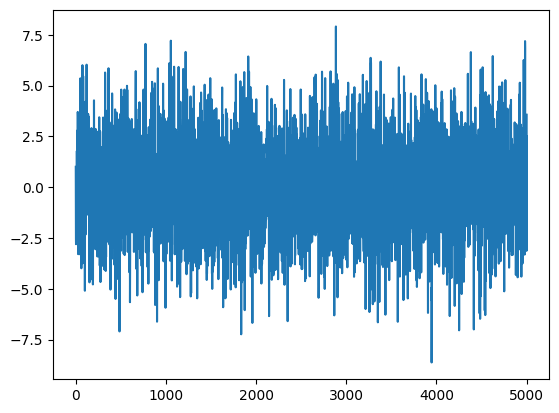

In [193]:
plt.plot(ns, sample_clean)
plt.show()

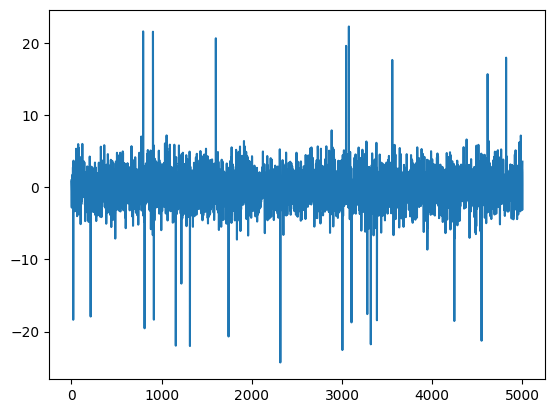

In [194]:
plt.plot(ns, sample_noisy)
plt.show()

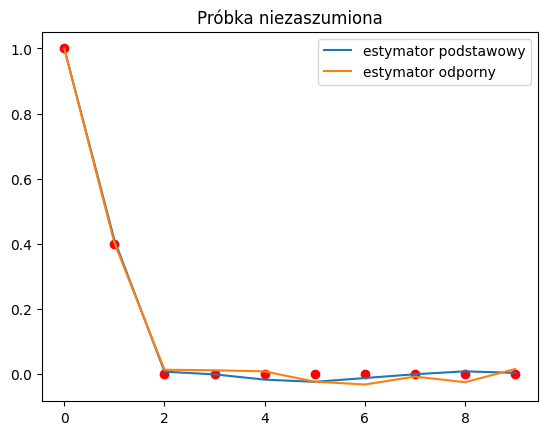

In [195]:
plt.plot(hs, teo_acfs, "ro")
plt.plot(hs, emp_acfs1_clean,label="estymator podstawowy")
plt.plot(hs, emp_afcs2_clean, label="estymator odporny")
plt.title("Próbka niezaszumiona")
plt.legend(loc="best")
plt.show()

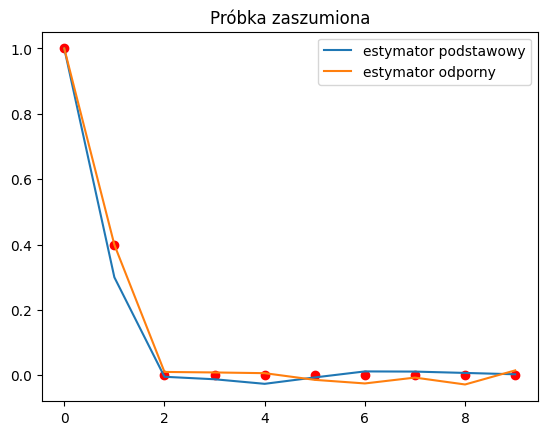

In [196]:
plt.plot(hs, teo_acfs, "ro")
plt.plot(hs, emp_afcs1_noisy, label="estymator podstawowy")
plt.plot(hs, emp_acfs2_noisy, label="estymator odporny")
plt.title("Próbka zaszumiona")
plt.legend(loc="best")
plt.show()

In [205]:
from joblib import Parallel, delayed  

def compute_sums(a, p, num_samples=100, n=1000, sigma=1, theta=2):
    teo_acf1 = ma1_teo_acf(1, theta)
    sum1, sum2 = 0, 0
    for _ in range(num_samples):
        sample_noisy, _ = ma1_w_noise(n, sigma, theta, a, p)
        emp_acf1_noisy = autokowariancja(1, sample_noisy) / autokowariancja(0, sample_noisy)
        emp_acf2_noisy = ro(1, sample_noisy)
        sum1 += abs(teo_acf1 - emp_acf1_noisy)
        sum2 += abs(teo_acf1 - emp_acf2_noisy)
    return sum1 / num_samples, sum2 / num_samples


In [206]:
a_s = np.arange(1,11,1)
p_s = np.arange(0.01,0.16,0.01)

results = Parallel(n_jobs=-1)(
    delayed(compute_sums)(a, p) for a in a_s for p in p_s
)
e1_a = np.array([res[0] for res in results]).reshape(len(a_s), len(p_s))
e2_a = np.array([res[1] for res in results]).reshape(len(a_s), len(p_s))


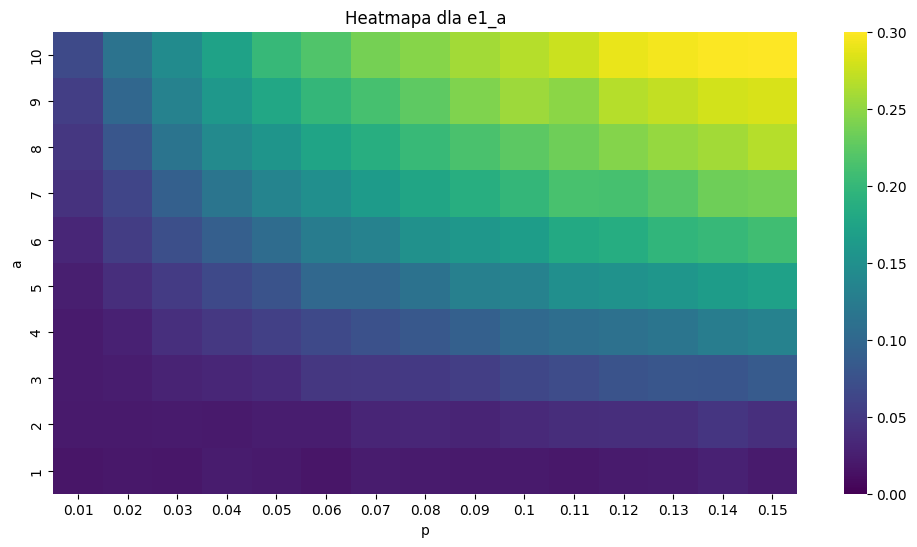

In [207]:
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.heatmap(e1_a, annot=False, cmap="viridis", xticklabels=p_s.round(2), yticklabels=a_s.round(2), vmin=0,vmax=0.3)
plt.xlabel("p")
plt.ylabel("a")
plt.title("Heatmapa dla e1_a")
plt.gca().invert_yaxis() 
plt.show()

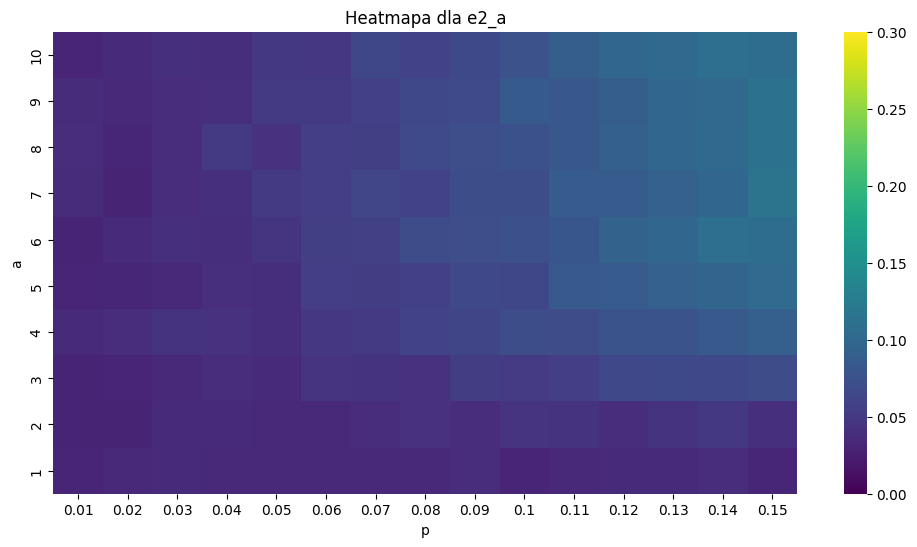

In [208]:
plt.figure(figsize=(12, 6))
sns.heatmap(e2_a, annot=False, cmap="viridis", xticklabels=p_s.round(2), yticklabels=a_s.round(2),vmin=0, vmax=0.3)
plt.xlabel("p")
plt.ylabel("a")
plt.title("Heatmapa dla e2_a")
plt.gca().invert_yaxis() 
plt.show()